In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
def wrangle(filepath):
  df = pd.read_csv(filepath)
  df[['Gender', 'Operating Status', 'Founded Date',
      'Company Type', 'Success', 'Founder']] = (
      df[['Gender', 'Operating Status', 'Founded Date', 'Company Type',
          'Success', 'Founder']].astype('str')
  )
  df['Closed Date'] = df['Closed Date'].astype('str').replace('0', 'Not closed')
  df.drop(columns=['Bio'], inplace=True)

  return df

In [3]:
df = wrangle("/content/drive/MyDrive/Datasets/dataset2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Full Name                        18361 non-null  object
 1   Primary Job Title                18361 non-null  object
 2   Gender                           18361 non-null  object
 3   Number of News Articles          18361 non-null  int64 
 4   Number of Founded Organizations  18361 non-null  int64 
 5   Number of Portfolio Companies    18361 non-null  int64 
 6   Number of Investments_x          18361 non-null  int64 
 7   Number of Partner Investments    18361 non-null  int64 
 8   Number of Lead Investments_x     18361 non-null  int64 
 9   Number of Exits_x                18361 non-null  int64 
 10  Number of Events_x               18361 non-null  int64 
 11  Categories                       18361 non-null  object
 12  Headquarters Location           

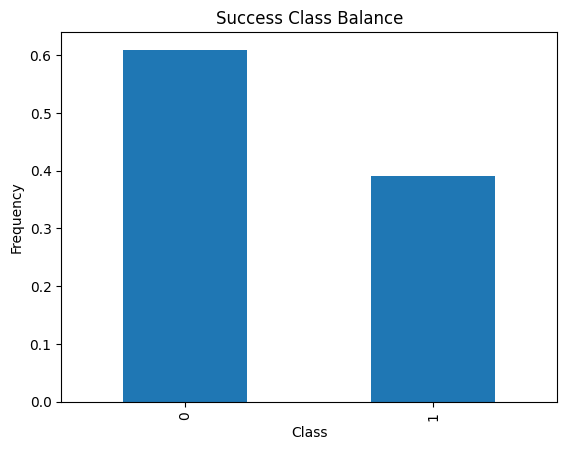

In [4]:
df['Success'].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Class",
    ylabel="Frequency",
    title="Success Class Balance"
);

In [5]:
X = df.drop(columns=['Success'])
y = df['Success']

print("X shape", X.shape)
print("y shape", y.shape)

X shape (18361, 19)
y shape (18361,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,
                                                    random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13770, 19)
y_train shape: (13770,)
X_test shape: (4591, 19)
y_test shape: (4591,)


In [7]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(random_state=42)
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Full Name', 'Primary Job Title', 'Gender',
                                     'Categories', 'Headquarters Location ',
                                     'Operating Status', 'Founded Date',
                                     'Closed Date', 'Company Type', 'Founder'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [8]:
model.score(X_train, y_train)

1.0

In [9]:
model.score(X_test, y_test)

0.7786974515356132

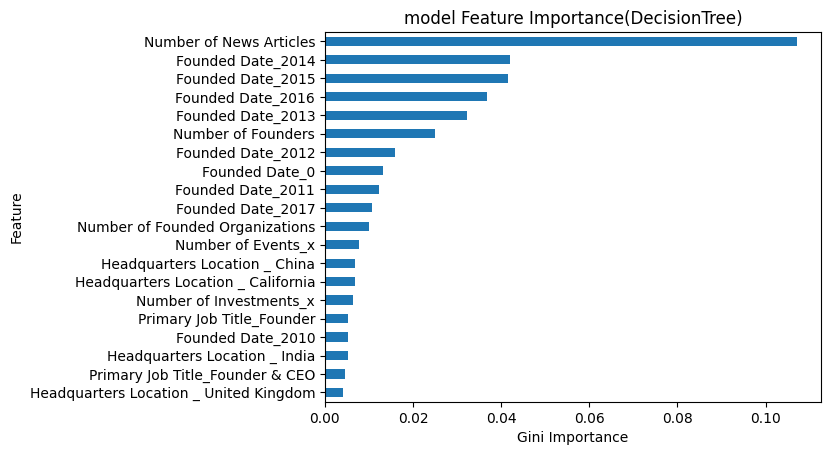

In [11]:
# Get importances
importances = model.named_steps['decisiontreeclassifier'].feature_importances_
categories = model.named_steps['onehotencoder'].get_feature_names_out(0)
# Put importances into a Series
feat_imp = pd.Series(importances, index=categories).sort_values()

# Plot series
feat_imp.tail(20).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model Feature Importance(DecisionTree)");
plt.savefig('FeatureImportance.png')